# Data wrangling for Networks

Different types of data for networks can come in the following forms
1. **Social networks**: friendships effecting each other's behaviours
2. **Spatially**: Spread of a virus between different markets, retail distributions of products and purchase behaviour of people
3. **Temporal**: Our network of friendships or contacts evolve in time this can be observe by tracking the evolution, network size, and density. 
4. **Spatiotemporal**: GPS data, network data with timestamps and location for social networks.
5. **Biological**: Genomics research that uses directed and ontology-based networks in uncovering disease mechanisms and forming new hypotheses about genetic links across disorders.
6. **Deep learning:** Adjusting pruning or dropout parameters when fine-tuning a pre-trained transformer model, this generates different  networks which can be analyzed
7. **Linguitics**: History and etymology of words 

In [89]:
#import packages
import igraph as ig
from igraph import Graph
import numpy as np
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [65]:
data_directory = "/home/sako/Data science lessons/Graph Theory/Modern-Graph-Theory-Algorithms-with-Python-main/data/"

## 1. Spatial correlation

### Data for prices per region with respect to yearly quarters

In [2]:
#import Burkina Faso market millet prices from the csv file
File="/home/sako/Data science lessons/Graph Theory/Modern-Graph-Theory-Algorithms-with-Python-main/data/BF_Millet.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
mydata=pd.read_csv(os.path.basename(File),encoding='latin1')

In [3]:
mydata.iloc[:5]

,Year,BALÃ,BAM,BANWA,BAZÃGA,BOUGOURIBA,BOULGOU,BOULKIEMDÃ,COMOÃ,GANZOURGOU,...,SISSILI,SOUM,SOUROU,TAPOA,TUY,YAGHA,YATENGA,ZIRO,ZONDOMA,ZOUNDWÃOGO
0,2015Q2,163.166667,8252.833333,153.666667,195.000000,194.666667,5619.444444,191.666667,218.000000,179.333333,...,190.000000,197.833333,180.000000,192.666667,142.000000,7655.444444,202.636667,164.333333,192.666667,188.333333
1,2015Q3,165.166667,8851.000000,151.000000,216.000000,208.000000,5900.444444,200.000000,211.000000,173.666667,...,198.000000,207.166667,185.333333,191.666667,160.000000,8496.222222,204.666667,165.000000,190.666667,201.666667
2,2015Q4,153.666667,8596.000000,137.666667,208.666667,174.666667,5564.777778,196.333333,210.333333,166.666667,...,216.000000,183.666667,170.000000,184.800000,144.333333,7085.333333,200.333333,164.000000,173.000000,192.666667
3,2016Q1,154.666667,8095.000000,130.666667,208.333333,180.666667,5506.555556,184.333333,194.333333,167.333333,...,212.333333,187.166667,169.000000,150.600000,134.666667,7364.777778,197.333333,139.333333,182.666667,193.000000
4,2016Q2,157.333333,8267.000000,151.000000,227.666667,213.333333,5855.222222,183.000000,210.666667,178.666667,...,214.666667,204.833333,183.000000,154.000000,139.000000,7656.777778,194.666667,151.666667,198.000000,208.666667


#### Weight matrix
Matrix showing neighbouring regions as weight matrix. If two regions are neigbouring the value is 1

In [4]:
#import weight matrix of Burkina Faso markets
File="/home/sako/Data science lessons/Graph Theory/Modern-Graph-Theory-Algorithms-with-Python-main/data/weights_bk.csv"
pwd=os.getcwd()
os.chdir(os.path.dirname(File))
weights=pd.read_csv(os.path.basename(File),encoding='latin1')

In [5]:
weights.sample(5)

,Year,BALÃ,BAM,BANWA,BAZÃGA,BOUGOURIBA,BOULGOU,BOULKIEMDÃ,COMOÃ,GANZOURGOU,...,SISSILI,SOUM,SOUROU,TAPOA,TUY,YAGHA,YATENGA,ZIRO,ZONDOMA,ZOUNDWÃOGO
44,ZOUNDWÃOGO,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35,SISSILI,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
43,ZONDOMA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
27,NOUMBIEL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,BALÃ,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Spatial analysis using the Local Moran's Statistic

In statistics, the Moran index (or Moran's I) is a measure of spatial autocorrelation developed by Patrick Moran. 

Spatial autocorrelation is characterized by a correlation between geographically neighboring measurements of a phenomenon being measured.

 

In [53]:
# remove the data column
data = mydata.iloc[:,1:46]
weights_total=weights.iloc[:,1:46]

# The Graph.Adjacency function needs 0/1 inputs, it can't take numerical weights
cor=np.corrcoef(data.transpose())
cor[cor>0]=1
cor_weighted=np.multiply(cor,weights_total)

In [54]:
cor_weighted.to_numpy()

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Visualizing the correlations via the graph

#### Build the graph and remove self-nodes via matrix

In [55]:
# remove self value 
cor_weighted_selfless = cor_weighted - np.identity(45)

In [56]:
# create market graph and get rid of loops created from the correlation
bf_market_w = Graph.Adjacency(cor_weighted_selfless.to_numpy(),mode='undirected')

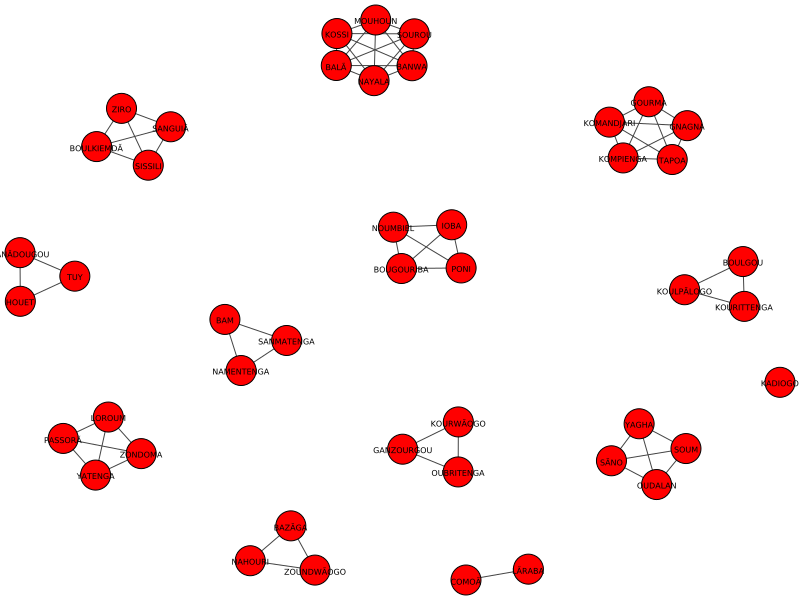

In [57]:
#create plot
#create plot
ig.plot(bf_market_w,bbox= (800,600), 
        vertex_size=30,
        vertex_label_size=8,
        vertex_label=cor_weighted)

#### Remove nodes via node remover from iGraph

In [58]:
# Let's remove nodes
bf_market_w = Graph.Adjacency(cor_weighted.to_numpy(),mode='undirected')

# Let's remove the self loops
edge_list=bf_market_w.get_edgelist()

# get the self ids
self_loop= [ (i,i) for i in range(0,45)]

# remove it 
bf_market_w.delete_edges(self_loop)

#### Modify to split difference between correlated prices and similar regions

Here we will replace all the ones which are based on region vs pure correlation 

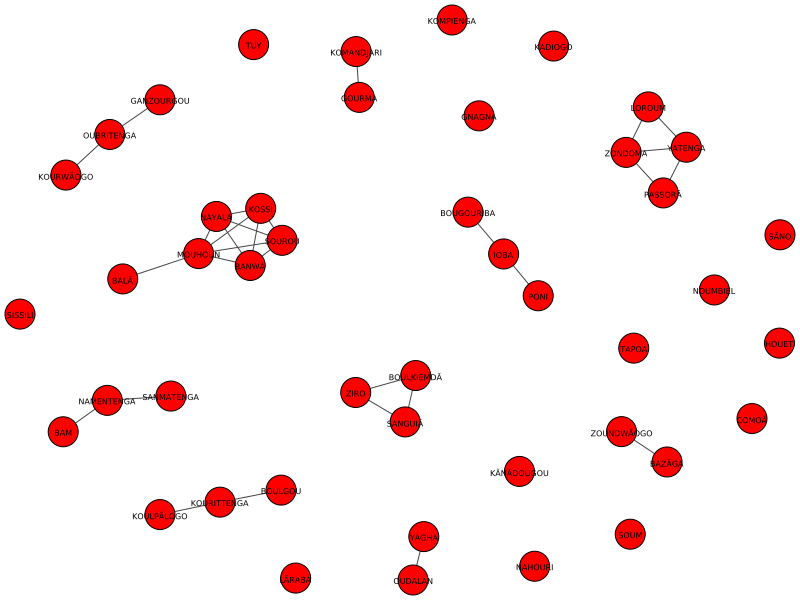

In [59]:
# The Graph.Adjacency function needs 0/1 inputs, it can't take numerical weights
cor = np.corrcoef(data.transpose())

# Remove self loops 
cor = cor - np.identity(45)

# visualize 
cor[cor >=0.9] = 1
cor[cor <0.9] = 0

# Create matrix 
cor_weighted=np.multiply(cor,weights_total) 

# Create matrix and remove self loops 
bf_market_w = Graph.Adjacency(cor_weighted.to_numpy(),mode='undirected')
"""if you multiply by 3 ... It draws 3 lines"""

#create plot

ig.plot(bf_market_w,bbox= (800,600), 
        vertex_size=30,
        vertex_label_size=8,
        vertex_label=cor_weighted)

## 2. Social Network

This section is about the interaction between students

In [67]:
fichier = pd.read_csv(data_directory+"AIMS_data.csv")
data = pd.DataFrame(fichier)

In [178]:
data.loc[55] = ['Sarkis', 'Syria', 60, 'Data Science', "Physics","Vicky","Sam","Caroline","Jack","Mavis"] 

#### Upload nodes and create graph

In [179]:
#intializing the social network
aimsNetwork = nx.Graph()

#populating the network with nodes and edges
for i in range(len(data["Name"])) : 
    
    # iterate for each person to create nodes and add the attributes  
    aimsNetwork.add_node(data["Name"][i], 
                         Age = data["Age"][i], #These are additional attributes
                         country = data["Country"][i],   
                         Field = data["Field"][i], 
                         background=data["Background"][i])


for j in range(len(data["Name"])) :
    aimsNetwork.add_edge(data["Name"][j], data["Friend 1"][j])
    aimsNetwork.add_edge(data["Name"][j], data["Friend 2"][j])
    aimsNetwork.add_edge(data["Name"][j], data["Friend 3"][j])
    aimsNetwork.add_edge(data["Name"][j], data["Friend 4"][j])
    aimsNetwork.add_edge(data["Name"][j], data["Friend 5"][j])

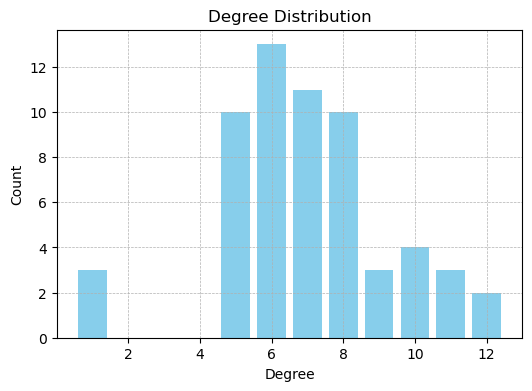

In [180]:
# Plot the degree distribution
degree_sequence = [d for n, d in aimsNetwork.degree()]
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

plt.figure(figsize=(6, 4))
plt.bar(deg, cnt, width=0.80, color="skyblue")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

In [182]:
# Extract background
categories = [] 
for n in aimsNetwork.nodes():
    if "background" in aimsNetwork.nodes[n]:
        res = aimsNetwork.nodes[n]['background']
    else: 
        res = None
    categories.append(res)

In [186]:
# Extract ages
age = [] 
for n in aimsNetwork.nodes():
    if "Age" in aimsNetwork.nodes[n]:
        res = 100*aimsNetwork.nodes[n]['Age']
    else: 
        res = 10
    age.append(res)

In [189]:
# Extract Degrees
Degree = aimsNetwork.degree()

# Use degrees as size for nodes
var = [250*k[1] for k in list(Degree)]

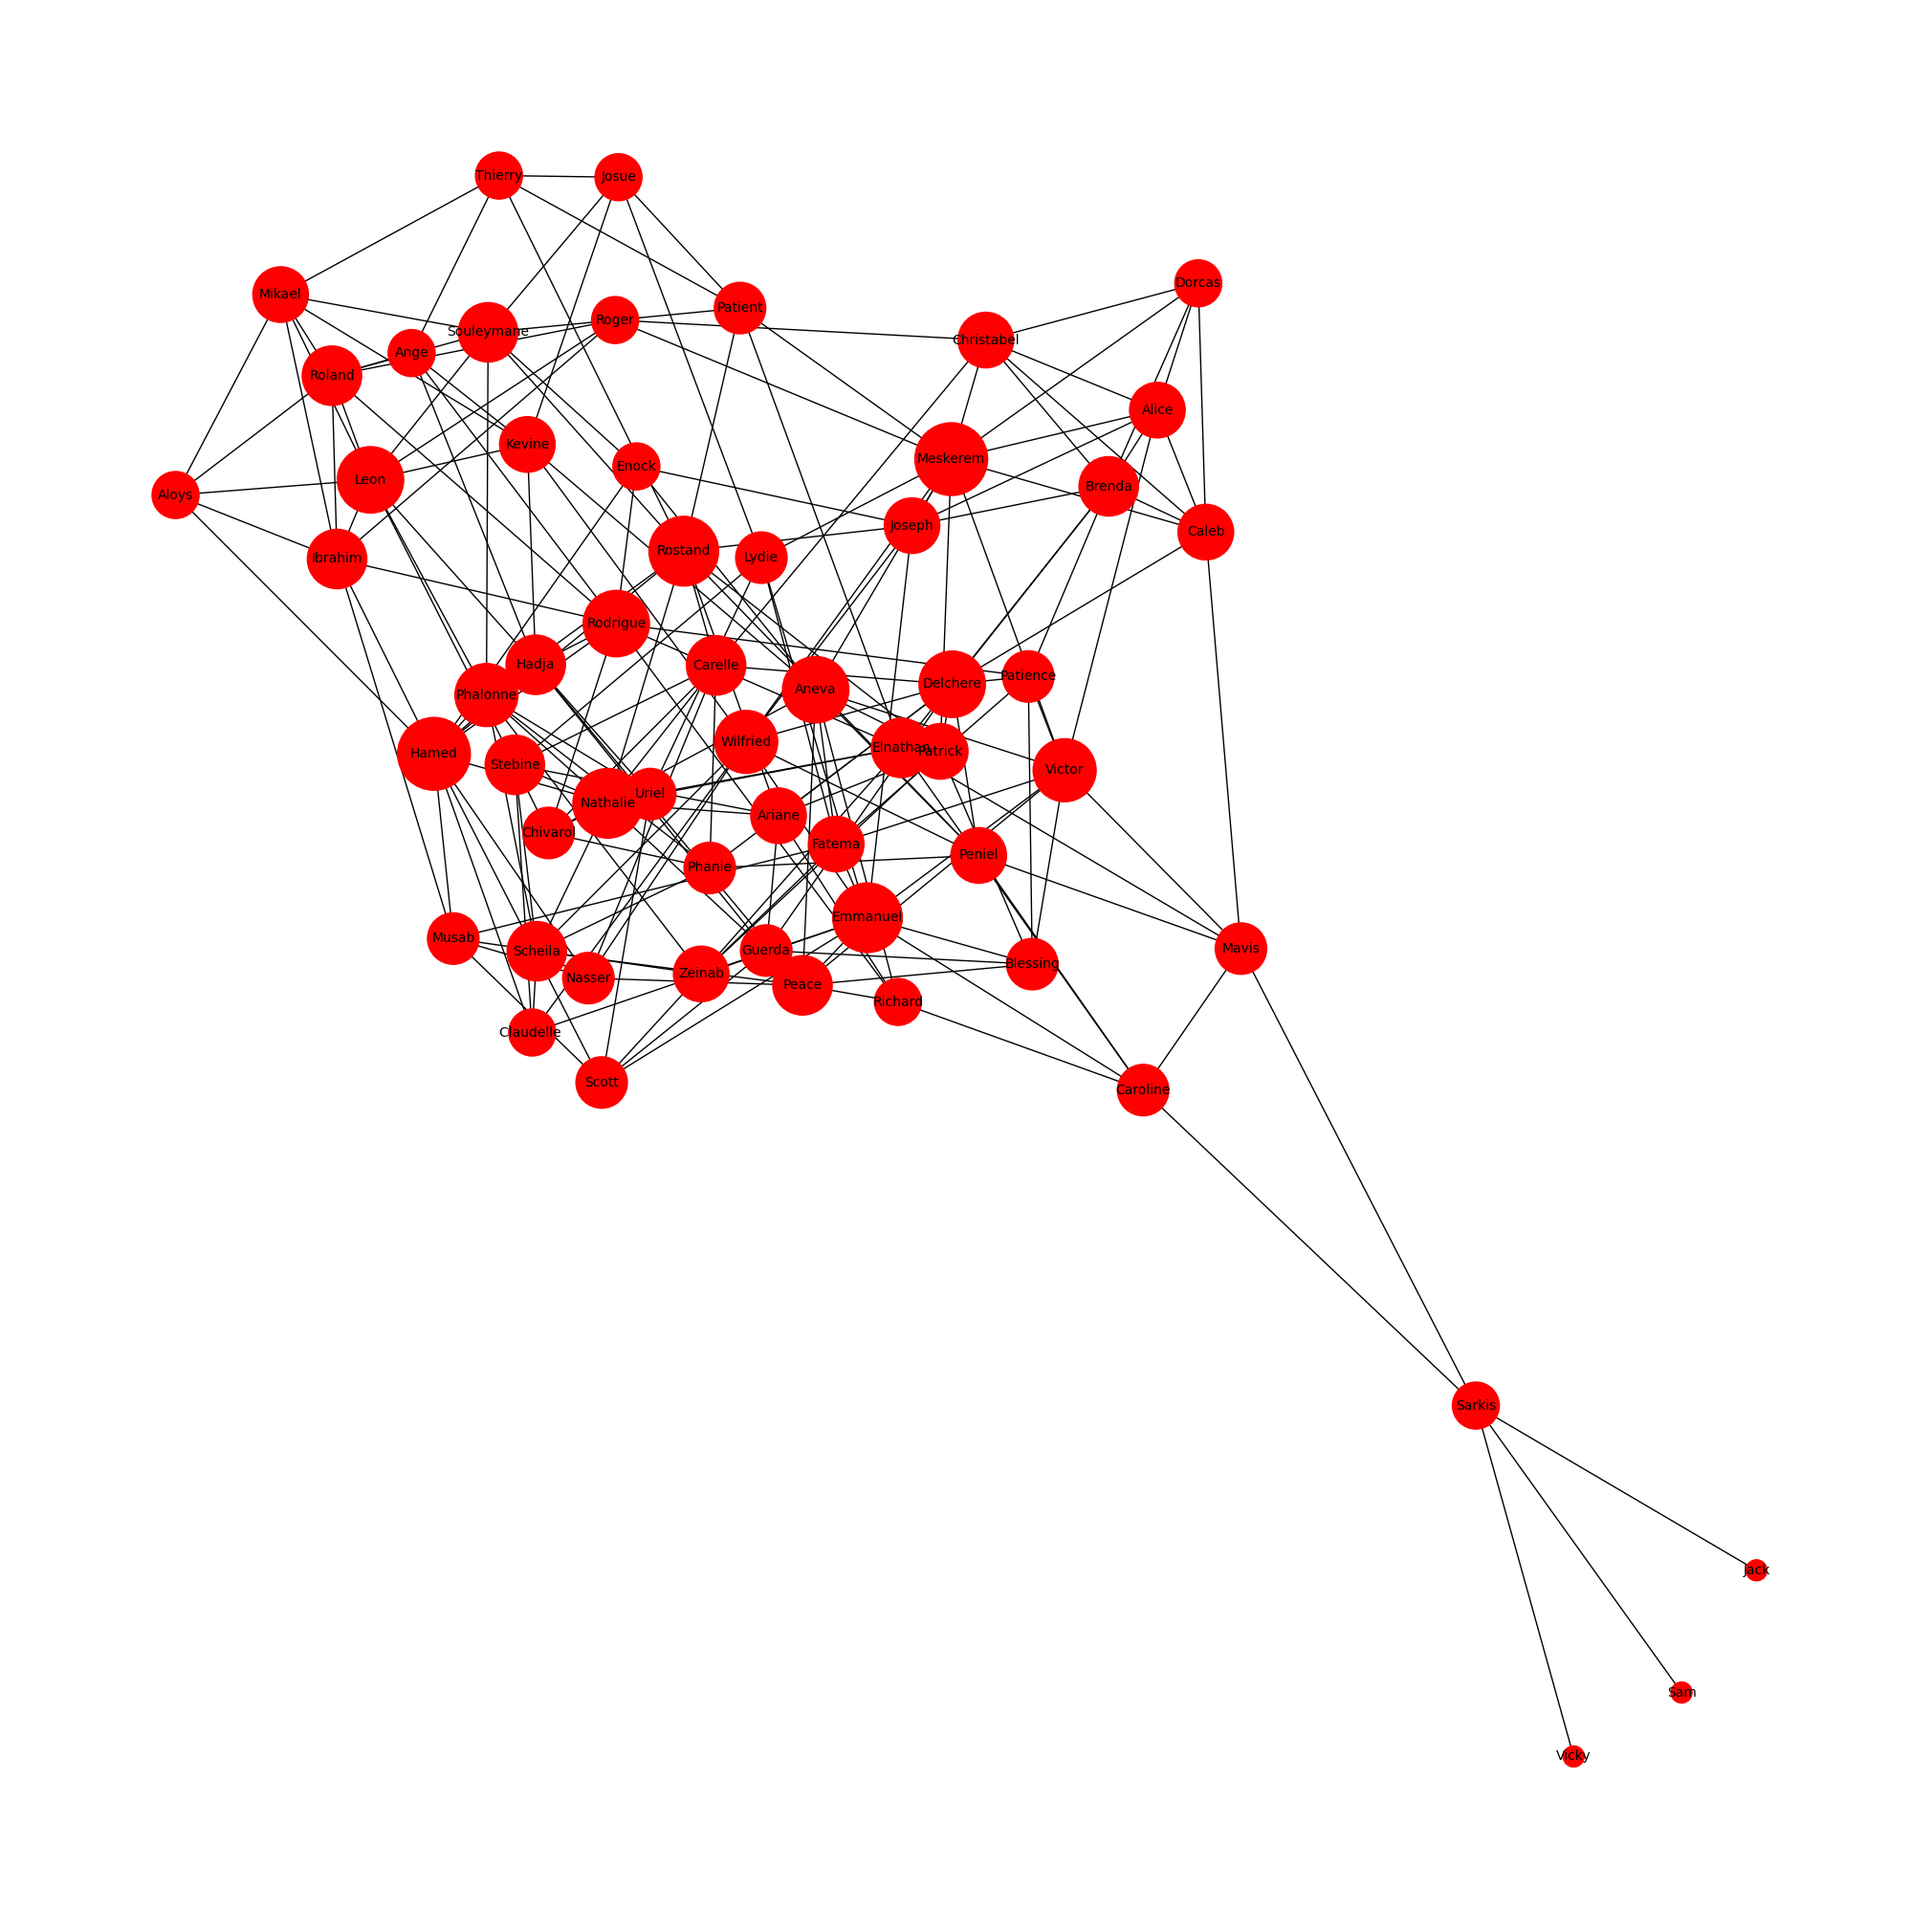

In [190]:
#plot AIMS student social network
plt.figure(figsize=(20,20))
nx.draw_spring(aimsNetwork, 
               font_size=10, 
               node_size = var,
               with_labels=True, 
               node_color="red")
plt.show()